## Neural Network
In this notebook we will implement Neural Network from scratch

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.datasets import make_classification,make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
class Layer:
    def __init__(self,input_neurons,output_neurons,activation):
        self.w = np.random.randn(input_neurons,output_neurons)
        self.b = np.random.randn(output_neurons)
        self.activation = activation
        self.A = None
        self.dZ = None
        self.dA = None
    
    
    def forward_pass(self,x):
        wx = np.dot(x,self.w) + self.b
        h =self.apply_activation(wx)
        self.A = h
        return h
    
    def apply_activation(self,x,alpha=.01):
        if self.activation=='relu':
            return max(0,x)
        elif self.activation=='leaky_relu':
            return max(.01*x,x)
        elif self.activation=='tanh':
            return np.tanh(x)
        elif self.activation=='sigmoid':
            return 1 / (1 + np.exp(-x))
        
    def derive_activation(self,x):
        if self.activation=='relu':
                d_relu = 1*(x>0)
                return d_relu
        
        elif self.activation=='leaky_relu':
            if x>0:
                d_leaky_relu = 1
            else:
                d_leaky_relu = .01
                
            return d_leaky_relu
        
        elif self.activation=='tanh':
            d_tanh = 1-(x**2)
            return d_tanh
       
        elif self.activation=='sigmoid':
            return x*(1-x)
    
class NeuralNetwork:
    def __init__(self,learning_rate=.01):
        self.layers = []
        self.n = None
        self.learning_rate = learning_rate
        self.log = {'train_loss':[],'epoch':[]}
    
    def feed_forward(self,x):
        for layer in self.layers:
            x = layer.forward_pass(x)
        return x
    
    def add_layer(self,layer):
        self.layers.append(layer)
    
    def mse_loss(self,target,predict):
        return np.mean(np.square(target - predict))
    
    def cross_entropy_loss(self,y,y_hat):
        cost = -(1/self.n)*np.sum((y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
        return cost
    
    def update_weights(self):
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i==0:
                layer.w = layer.w - (1.0/self.n)*(self.learning_rate*np.dot(X.T,layer.dZ))
                layer.b = layer.b - (1.0/self.n)*(self.learning_rate*layer.dZ)
            else:
                prev_layer = self.layers[i-1]
                layer.w = layer.w - (1.0/self.n)*(self.learning_rate*np.dot(prev_layer.A.T,layer.dZ))
                layer.b = layer.b - (1.0/self.n)*(self.learning_rate*layer.dZ)
            
    def backpropagation(self,y,y_hat):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            if layer==self.layers[-1]:
                layer.dA = -np.divide(y,y_hat) + np.divide(1 - y, 1 - y_hat)
#                 layer.dA = -(y - y_hat)
                layer.dZ = layer.dA * layer.derive_activation(layer.A)
            else:
                next_layer = self.layers[i+1]
                layer.dA = np.dot(next_layer.dZ,next_layer.w.T)
                layer.dZ = layer.dA * layer.derive_activation(layer.A)                
                
                
    def train(self,X,y,max_epochs=100):
        self.n = X.shape[0]
        for epoch in range(1,max_epochs+1):
            y_hat = self.feed_forward(X)
            self.backpropagation(y,y_hat)
            self.update_weights()
            loss = self.cross_entropy_loss(y,y_hat)
#             loss = self.mse_loss(y,y_hat)
            self.log['train_loss'].append(loss)
            self.log['epoch'].append(epoch)
    
    def predict(self,X):
        y_hat = self.feed_forward(X)
        y_labels = (y_hat>.5)*1.0
        return y_labels
    
    def plot_loss(self):
        loss_train = self.log['train_loss']
        epochs = self.log['epoch']
        plt.plot(epochs, loss_train, 'g', label='Training loss')
        plt.title('Training loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
            
            

In [6]:
random_seed = 22
X, y = make_blobs(n_samples=1000, centers=2)
y = y[:, np.newaxis]

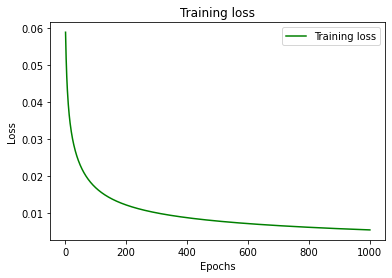

In [15]:
np.random.seed(100)
nn = NeuralNetwork()
nn.add_layer(Layer(2, 20, 'tanh'))
nn.add_layer(Layer(20, 10, 'tanh'))
nn.add_layer(Layer(10, 1, 'sigmoid'))
nn.train(X, y,max_epochs = 1000)
nn.plot_loss()
y_hat = nn.predict(X)

In [16]:
accuracy = np.sum(y_hat==y)/X.shape[0]

In [17]:
accuracy

1.0